In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-ham-data/Spam_Ham_data.csv
/kaggle/input/spam-ham-data/spam/spam/0351.517e785af43ffb3f9e66ab25b3ab162c
/kaggle/input/spam-ham-data/spam/spam/0230.035bbcbe1235cb6fdd0a5d6d626dc5c4
/kaggle/input/spam-ham-data/spam/spam/0428.8fc153d0c9cbc406fbd9bdf1c4ed9b13
/kaggle/input/spam-ham-data/spam/spam/0498.863566df8e5f17f979edca79d1e87187
/kaggle/input/spam-ham-data/spam/spam/0107.f1d4194b57840ea6587b9a73ed88e075
/kaggle/input/spam-ham-data/spam/spam/0468.8edb99340b9a96a81813be2d3362605d
/kaggle/input/spam-ham-data/spam/spam/0334.3e4946e69031f3860ac6de3d3f27aadd
/kaggle/input/spam-ham-data/spam/spam/0328.cccf842e57907e25d1584cad03f8d2cb
/kaggle/input/spam-ham-data/spam/spam/0118.4be8b50c2a818c62b62e70c4b5456113
/kaggle/input/spam-ham-data/spam/spam/0450.a828f09ee44e716e6931866e4743e32a
/kaggle/input/spam-ham-data/spam/spam/0093.2bb8a2a7e4d2841a14f27f32076dd77e
/kaggle/input/spam-ham-data/spam/spam/0305.2252f3b41c7fd3a43ac132a6b3391a3b
/kaggle/input/spam-ham-data/spam/spam/0332

### 1. Frame the Problem and Look at the Big Picture

**1. Define the objective in business terms.**
- **Objective**: Develop a spam filter model that accurately classifies incoming emails as spam or ham, reducing the time users spend managing their inboxes and improving productivity.

**2. How will your solution be used?**
- **Usage**: Users will input email content into a web application, which will utilize the model to predict whether the email is spam or ham. The result will help users filter out unwanted emails.

**3. What are the current solutions/workarounds (if any)?**
- **Current Solutions**: Many email providers (e.g., Gmail, Outlook) have built-in spam filters. However, these can sometimes be too generic or not tailored to specific user needs. Custom spam filters provide more personalized filtering.

**4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?**
- **Framing**: This is a supervised learning problem since we have labeled data (spam or ham emails). The solution will be deployed as an offline model, with periodic updates as new data becomes available.

**5. How should performance be measured?**
- **Performance Metrics**: Accuracy, precision, recall, F1 score. Special attention should be given to precision and recall to balance false positives and false negatives.

**6. Is the performance measure aligned with the business objective?**
- **Alignment**: Yes, high precision ensures that legitimate emails are not incorrectly classified as spam, while high recall ensures that most spam emails are identified, meeting the objective of reducing user time managing emails.

**7. What would be the minimum performance needed to reach the business objective?**
- **Minimum Performance**: A precision and recall of at least 95% to ensure reliability and user trust in the spam filter.

**8. What are comparable problems? Can you reuse experience or tools?**
- **Comparable Problems**: Text classification tasks such as sentiment analysis, phishing detection. Tools and techniques (like TF-IDF, Naive Bayes, SVM, neural networks) from these areas can be reused.

**9. Is human expertise available?**
- **Expertise**: Yes, expertise in machine learning, natural language processing, and web development will be beneficial.

**10. How would you solve the problem manually?**
- **Manual Solution**: Manually reading each email and classifying it based on certain keywords, phrases, and context that typically indicate spam or ham. This method is not scalable but helps in understanding the problem.

**11. List the assumptions you (or others) have made so far.**
- **Assumptions**:
  - The dataset is representative of the types of emails users receive.
  - Users will provide accurate inputs for the model.
  - The model can generalize well from the training data to real-world emails.
  
**12. Verify assumptions if possible.**
- **Verification**:
  - Validate the dataset by sampling and reviewing emails to ensure they cover various spam and ham scenarios.
  - Conduct user testing to gather feedback on input accuracy and model performance.
  - Perform cross-validation and testing on diverse datasets to ensure the model generalizes well.

### 2. Get the Data

**1. List the data you need and how much you need.**
- **Data Needed**: Emails labeled as spam or ham, including the email content and labels.
- **Quantity**: Enough data to train a robust model; typically, thousands of labeled emails are ideal. The exact amount depends on the complexity and variability of the data.

**2. Find and document where you can get that data.**
- **Source**: The dataset is available in your Kaggle notebook at `/kaggle/input/spam-ham-data/Spam_Ham_data.csv`.

**3. Check how much space it will take.**
- **Space Requirement**: Check the size of the file on Kaggle to ensure it fits within your available storage. You can do this by examining the file properties.

**4. Check legal obligations, and get authorization if necessary.**
- **Legal Check**: Ensure the dataset complies with data privacy regulations (e.g., GDPR, CCPA). Review the terms of use on Kaggle for any restrictions.

**5. Get access authorizations.**
- **Authorization**: Since the dataset is on Kaggle, ensure you have the necessary permissions to use it. If it’s a public dataset, this should be straightforward. If private, ensure you have access rights.

**6. Create a workspace (with enough storage space).**
- **Workspace**: Set up your Kaggle notebook environment with sufficient storage to handle the dataset and subsequent data processing.

**7. Get the data.**
- **Data Retrieval**: Load the dataset into your notebook. In Kaggle, this can be done using pandas:

In [3]:
import pandas as pd

data_path = '/kaggle/input/spam-ham-data/Spam_Ham_data.csv'
data = pd.read_csv(data_path)

**8. Convert the data to a format you can easily manipulate (without changing the data itself).**
- **Data Format**: Ensure the data is in a pandas DataFrame, which is easy to manipulate for further processing:

In [4]:
print(data.head())

                                               email  label  \
0  b'From exmh-workers-admin@redhat.com  Thu Aug ...    0.0   
1  b'Return-Path: <Online#3.19578.34-UgGTgZFN19NA...    0.0   
2  b'Return-Path: <Online#3.19584.83-p1SYlJ1blFvQ...    0.0   
3  b'From Steve_Burt@cursor-system.com  Thu Aug 2...    0.0   
4  b'Return-Path: <Online#3.19586.b5-9w0blztbvHPd...    0.0   

                                          Subject  \
0                              new sequenc window   
1            cnet newscom cabl compani crack wifi   
2  save extra number ipaq number pda cnet shopper   
3                               zzzzteana alexand   
4                      week deck texedit plu boom   

                                             content  
0  date wed number aug number number number chri ...  
1  htmlhead titlec compani crack nametopa logo ad...  
2  htmlhead newslett hreftopa header tabl widthnu...  
3  martin greek sculptor behind plan judg limesto...  
4  cnet download dispatchma


**9. Ensure sensitive information is deleted or protected (e.g., anonymized).**
- **Data Protection**: Review the dataset for any sensitive information. If any personal data is present, anonymize it to comply with privacy regulations.

**10. Check the size and type of data (time series, sample, geographical, etc.).**
- **Data Type**: Confirm the type of data. This dataset is likely a sample of email texts with corresponding labels.

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   email    3063 non-null   object 
 1   label    3063 non-null   float64
 2   Subject  3008 non-null   object 
 3   content  3059 non-null   object 
dtypes: float64(1), object(3)
memory usage: 95.8+ KB
None


**11. Sample a test set, put it aside, and never look at it (no data snooping!).**
- **Test Set**: Split the data into training and test sets. Put the test set aside for final evaluation:


In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [7]:
print(train_data.shape)

(2450, 4)


In [8]:
print(test_data.shape)

(613, 4)


### 3. Explore the Data

**1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).**

In [9]:
# If the dataset is large, consider sampling a subset
explore_data = data.sample(frac=0.1, random_state=42)

This line of code is used to create a smaller, more manageable sample of your dataset for exploratory data analysis. Here's a detailed explanation of each part:

1. **`data.sample()`**:
   - This method is used to generate a random sample of items from an axis of the DataFrame.

2. **`frac=0.1`**:
   - The `frac` parameter specifies the fraction of the data to return. In this case, `frac=0.1` means that you want to sample 10% of the original dataset.
   - If your dataset has 10,000 rows, `data.sample(frac=0.1)` will return a new DataFrame with 1,000 randomly selected rows.

3. **`random_state=42`**:
   - The `random_state` parameter is used to seed the random number generator. This ensures that the same rows are selected every time you run the code, which is useful for reproducibility.
   - Setting `random_state` to a specific number (e.g., 42) makes the sampling process deterministic. If you use the same `random_state` value, you will get the same sample each time you run the code.

4. **`explore_data =`**:
   - This part assigns the sampled data to a new variable called `explore_data`. This new DataFrame contains 10% of the rows from the original `data` DataFrame, randomly selected.

**In summary**: This code creates a smaller, randomly selected subset of your original dataset, containing 10% of the rows. This subset is used for exploratory data analysis, making the analysis faster and more manageable. Using `random_state=42` ensures that you can reproduce the same subset in future runs.

**2. Study each attribute and its characteristics:**

**Name and Type (categorical, int/float, bounded/unbounded, text, structured, etc.)**

In [10]:

explore_data.info()
explore_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 1241 to 2755
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   email    306 non-null    object 
 1   label    306 non-null    float64
 2   Subject  303 non-null    object 
 3   content  305 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.0+ KB


,email,label,Subject,content
1241,b'From exmh-users-admin@redhat.com Tue Sep 10...,0.0,patch complet chang,donerobert elz said suspect part chris' set ch...
203,b'Return-Path: <Online#3.20520.de-C6GhlCa9O-fq...,0.0,cordless phone wireless devic,htmlhead titlecnet cell phone hreftopa header ...
1260,b'From exmh-users-admin@redhat.com Fri Sep 13...,0.0,link messag patch complet chang,tue sep number number number robert elz wrote ...
1626,"b""From razor-users-admin@lists.sourceforge.net...",0.0,razorus razor sendmail,i'm recip use razor sendmail can't get procmai...
1578,b'From prlawrence@lehigh.edu Thu Aug 29 11:06...,0.0,satalk test instal,justin mason wrote phil r lawrenc said someth ...


**% of Missing Values**

In [11]:
missing_values = explore_data.isnull().mean() * 100
print(missing_values)

email      0.000000
label      0.000000
Subject    0.980392
content    0.326797
dtype: float64


The output you provided shows the percentage of missing values for each column in your `explore_data` DataFrame. Here's a detailed interpretation:

```python
email      0.000000
label      0.000000
Subject    0.980392
content    0.326797
dtype: float64
```

**Comments:**

1. **email (0.000000%)**:
   - There are no missing values in the `email` column. This is good, as it means every record has an associated email.

2. **label (0.000000%)**:
   - There are no missing values in the `label` column, which is essential for your classification task since each email must be labeled as either spam or ham.

3. **Subject (0.980392%)**:
   - Approximately 0.98% of the values in the `Subject` column are missing. This is relatively low and may not significantly impact your model. However, you might consider handling these missing values, either by imputing them with a placeholder like "No Subject" or using another imputation strategy.

4. **content (0.326797%)**:
   - About 0.33% of the values in the `content` column are missing. The `content` of the email is crucial for the classification task, so you should handle these missing values. Possible strategies include:
     - Imputing the missing content with a placeholder.
     - Dropping the rows with missing content if the proportion is acceptable.
     - Analyzing if these rows with missing content are important and finding a specific imputation strategy.

**Noisiness and Type of Noise (stochastic, outliers, rounding errors, etc.)**

- Visual inspection and summary statistics can help identify noise.

In [12]:
summary_stats = explore_data.describe()
print(summary_stats)

            label
count  306.000000
mean     0.137255
std      0.344680
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000


The output of the `describe()` function for the `label` column provides summary statistics for the target variable in your dataset. Here's a detailed interpretation:

```python
            label
count  306.000000
mean     0.137255
std      0.344680
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000
```

**Comments:**

1. **count (306)**:
   - There are 306 entries in the `label` column. This indicates that there are 306 emails in your sample dataset after any filtering or sampling.

2. **mean (0.137255)**:
   - The mean value of the `label` column is approximately 0.137. Since this is a binary classification problem where `0` might represent ham and `1` might represent spam, the mean indicates the proportion of spam emails in the dataset. About 13.7% of the emails are labeled as spam.

3. **std (0.344680)**:
   - The standard deviation is approximately 0.345, which shows the variation in the `label` values. Given that the labels are binary, this value indicates some variability in the spam vs. ham distribution, but not an equal split.

4. **min (0.000000)**:
   - The minimum value is `0`, which confirms the presence of ham emails in the dataset.

5. **25% (0.000000)**:
   - The first quartile (25th percentile) value is `0`, meaning that at least 25% of the emails are ham.

6. **50% (0.000000)**:
   - The median (50th percentile) value is `0`, indicating that at least half of the emails are ham. This is consistent with the mean value, suggesting that ham emails dominate the dataset.

7. **75% (0.000000)**:
   - The third quartile (75th percentile) value is `0`, which means that at least 75% of the emails are ham.

8. **max (1.000000)**:
   - The maximum value is `1`, which confirms the presence of spam emails in the dataset.

**Implications for Modeling:**

- **Class Imbalance**: The dataset shows a class imbalance, with a much higher proportion of ham emails (86.3%) compared to spam emails (13.7%). This class imbalance is a crucial factor to consider during model training, as it may affect the model's performance. Techniques such as resampling (oversampling the minority class or undersampling the majority class), using class weights, or employing specialized algorithms for imbalanced data may be needed.




**Usefulness for the Task**

- Determine the relevance of each feature for spam classification.

**Type of Distribution (Gaussian, uniform, logarithmic, etc.)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


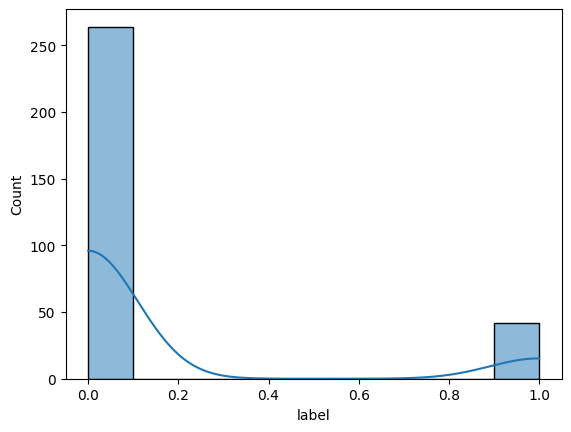

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for a numeric attribute
sns.histplot(explore_data['label'], kde=True)
plt.show();

The histogram plot illustrates the distribution of the `label` column in your dataset, which is used for classifying emails as spam (1) or ham (0). Here's a detailed comment on this:

### Comments:

1. **Class Distribution**:
   - The histogram confirms the class imbalance observed in the summary statistics.
   - The majority of the emails are classified as ham (label = 0), which is represented by the taller bar on the left.
   - A smaller proportion of emails are classified as spam (label = 1), which is represented by the shorter bar on the right.

2. **Implications of Class Imbalance**:
   - The significant imbalance between ham and spam emails means that the model might be biased towards predicting ham more frequently.
   - This class imbalance can lead to a high accuracy rate while still performing poorly on detecting spam, as the model could simply predict the majority class to achieve high accuracy.

3. **Next Steps to Address Class Imbalance**:
   - **Resampling Techniques**: Implement techniques such as oversampling the minority class (spam) or undersampling the majority class (ham) to balance the dataset.
   - **Synthetic Data Generation**: Use methods like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples of the minority class.
   - **Class Weights**: Modify the learning algorithm to account for the imbalance by assigning higher weights to the minority class.

### Conclusion:

The histogram plot highlights the importance of addressing class imbalance in your dataset. By implementing appropriate techniques to balance the classes, you can improve the model's ability to detect spam emails effectively.

**3. For supervised learning tasks, identify the target attribute(s).**

- The target attribute is 'label', with classes 'spam' and 'ham'.

In [14]:
target = 'label'  # Adjust this to your dataset's target column name
print(explore_data[target].value_counts())

label
0.0    264
1.0     42
Name: count, dtype: int64


The output of the `value_counts()` function for the `label` column provides the count of each class (spam and ham) in your dataset. Here's a detailed interpretation:

```python
label
0.0    264
1.0     42
```

**Comments:**

1. **Class Distribution**:
   - There are 264 instances of ham emails (label 0).
   - There are 42 instances of spam emails (label 1).

2. **Class Imbalance**:
   - The dataset is highly imbalanced, with ham emails (264) vastly outnumbering spam emails (42).
   - This imbalance means that approximately 86.3% of the emails are ham, and only 13.7% are spam.
   - In a classification task, this imbalance can lead to a model that is biased towards predicting the majority class (ham) more often than the minority class (spam).

3. **Impact on Model Performance**:
   - Without addressing the class imbalance, a model might achieve high overall accuracy by predominantly predicting the majority class (ham) but perform poorly on the minority class (spam).
   - This would result in a high rate of false negatives (spam emails misclassified as ham), which is undesirable for a spam filter.

4. **Strategies to Address Class Imbalance**:
   - **Resampling Techniques**: Use oversampling or undersampling to balance the classes.
   - **Synthetic Data Generation**: Generate synthetic samples of the minority class using methods like SMOTE (Synthetic Minority Over-sampling Technique).
   - **Class Weights**: Adjust the class weights in the learning algorithm to give more importance to the minority class.
   - **Anomaly Detection**: Treat the minority class (spam) as anomalies and apply anomaly detection techniques.

**4. Visualize the data.**

- Use various plots to understand the distribution and relationships in the data.

/tmp/ipykernel_33/615931688.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  explore_data['content'].fillna('', inplace=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


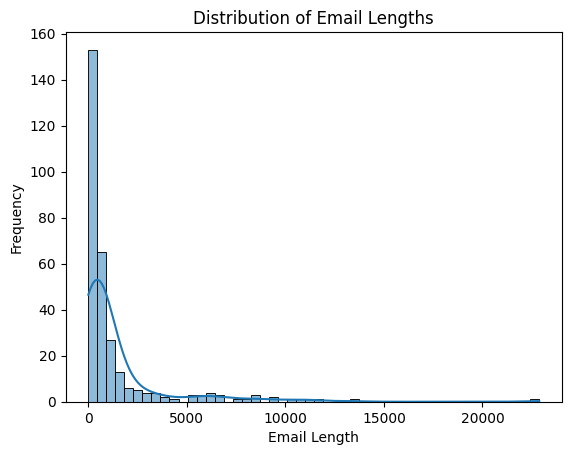

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Handle missing values by filling with an empty string
explore_data['content'].fillna('', inplace=True)

# Example: Visualizing the length of emails
explore_data['email_length'] = explore_data['content'].apply(len)
sns.histplot(explore_data['email_length'], bins=50, kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.show()

The plot you provided shows the distribution of email lengths in the dataset, which is useful for understanding the general characteristics of the emails. Here are a few comments on the plot and its implications:

### Comments on the Plot

1. **Distribution Shape**:
   - The distribution of email lengths appears to be right-skewed, with the majority of emails being relatively short. This is indicated by the tall peak on the left and a long tail extending to the right.
   - There are a few outliers with very long email lengths, which are visible as individual bars towards the right end of the plot.

2. **Implications for Spam Detection**:
   - Understanding the distribution of email lengths can help in feature engineering. For example, extremely short or extremely long emails might have different probabilities of being spam.
   - If there are significant differences in the lengths of spam and ham emails, this feature could be informative for the model.

3. **Next Steps**:
   - Further analyze the relationship between email length and the target variable (spam vs. ham) to determine if there is a pattern or threshold that can be used in the model.
   - Visualize the distribution of email lengths separately for spam and ham emails to see if there are noticeable differences.


### Additional Visualizations

**Distribution of Email Lengths by Spam and Ham**:
This additional visualization will help to understand if spam and ham emails have different length distributions.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


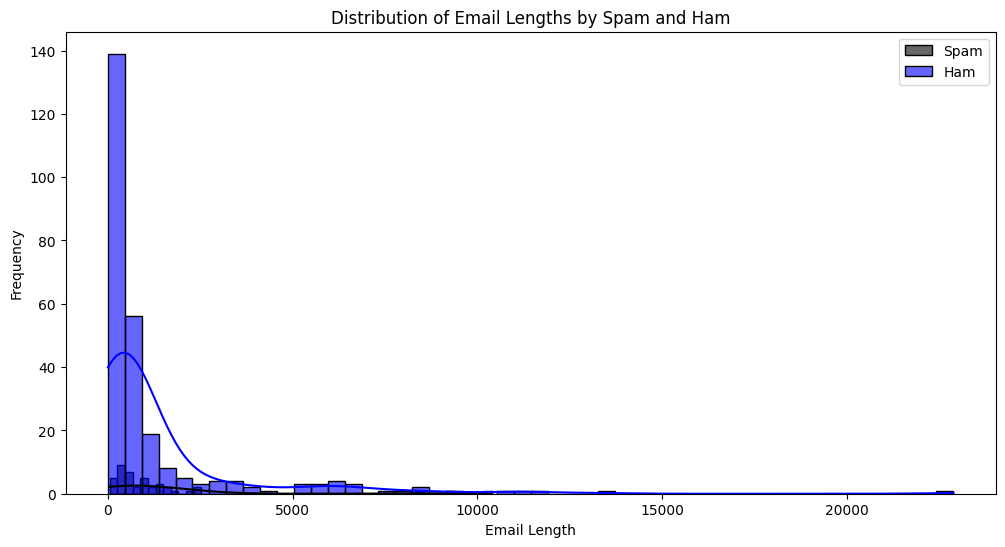

In [16]:
# Adding a column to indicate the length of each email
explore_data['email_length'] = explore_data['content'].apply(len)

# Separate the datasets
spam_emails = explore_data[explore_data[target] == 1]
ham_emails = explore_data[explore_data[target] == 0]

# Plotting the distribution of email lengths for spam and ham
plt.figure(figsize=(12, 6))

# Plot for spam emails
sns.histplot(spam_emails['email_length'], bins=50, kde=True, color='black', label='Spam', alpha=0.6)
# Plot for ham emails
sns.histplot(ham_emails['email_length'], bins=50, kde=True, color='blue', label='Ham', alpha=0.6)

plt.title('Distribution of Email Lengths by Spam and Ham')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The plot you provided shows the distribution of email lengths for both spam and ham emails. Here are a few comments and insights based on the plot:

### Comments on the Plot

1. **Distribution Shape**:
   - Both spam and ham email length distributions are right-skewed, with most emails being relatively short.
   - There are a few outliers with very long email lengths, particularly noticeable for ham emails.

2. **Comparison Between Spam and Ham**:
   - Both distributions have a significant peak at very short lengths (0-500 characters), indicating that many emails, regardless of being spam or ham, are quite short.
   - The distribution for ham emails has a broader spread with more variability, including longer emails. This could be indicative of legitimate emails containing more detailed content.
   - Spam emails also show variability but with fewer extremely long emails compared to ham emails.

3. **Insights for Model Training**:
   - Email length could be a useful feature for distinguishing between spam and ham, but it might need to be combined with other features for better accuracy.
   - The presence of very short emails in both categories suggests that length alone won't be a strong discriminator, but it can contribute to the model.

4. **Handling Outliers**:
   - Consider handling extreme outliers, especially very long emails, as they can disproportionately affect the model. This might involve capping the length or using a log transformation.

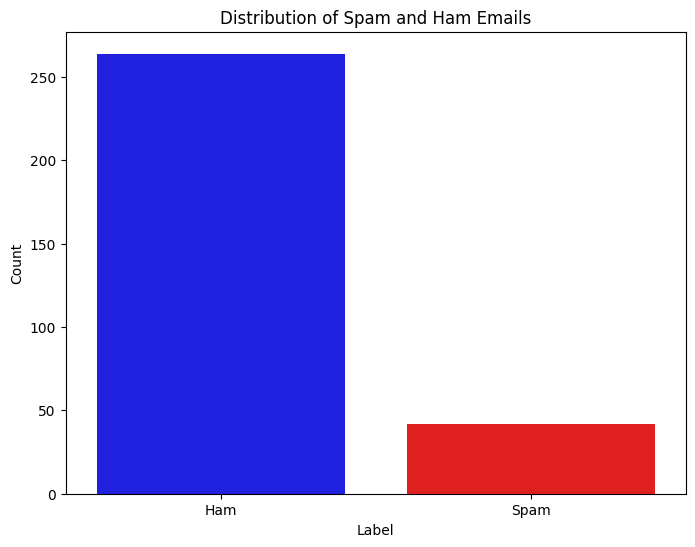

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of spam and ham
plt.figure(figsize=(8, 6))
sns.countplot(x=target, data=explore_data, palette=['blue', 'red'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

### Comments on the Plot: Distribution of Spam and Ham Emails

1. **Class Distribution**:
   - The plot shows a clear and significant class imbalance between ham (legitimate) emails and spam emails.
   - The blue bar representing ham emails is substantially taller than the red bar representing spam emails.
   - Specifically, there are approximately 264 ham emails and 42 spam emails in the dataset.

2. **Class Imbalance**:
   - The dataset has a higher number of ham emails compared to spam emails, with ham emails making up the majority of the data.
   - This imbalance is typical in email datasets, where legitimate emails usually outnumber spam emails.

3. **Implications for Model Training**:
   - Training a machine learning model on this imbalanced dataset without addressing the imbalance may result in a model that is biased towards predicting the majority class (ham emails).
   - Such a model might achieve high overall accuracy but will likely have poor performance in detecting spam emails, leading to a high rate of false negatives (spam emails misclassified as ham).

4. **Strategies to Address Class Imbalance**:
   - **Resampling Techniques**:
     - **Oversampling**: Increase the number of spam email samples in the training set by duplicating existing spam emails or generating synthetic ones (e.g., using SMOTE).
     - **Undersampling**: Decrease the number of ham email samples to balance the dataset.
   - **Class Weights**: Assign higher weights to the minority class (spam) in the learning algorithm to give more importance to spam emails during training.
   - **Anomaly Detection**: Treat spam emails as anomalies and use anomaly detection techniques.
   - **Ensemble Methods**: Use ensemble methods such as Random Forest or Gradient Boosting, which can handle imbalanced datasets better than individual classifiers.

**5. Study the correlations between attributes.**
Ensure all relevant attributes are numeric. For text attributes, such as content and Subject, we will use their lengths as numeric representations.


In [18]:
# Add email content length and subject length if not already done
explore_data['email_length'] = explore_data['content'].apply(lambda x: len(x) if isinstance(x, str) else 0)
explore_data['subject_length'] = explore_data['Subject'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Selecting relevant attributes for correlation analysis
attributes = ['label', 'email_length', 'subject_length']


**Compute the Correlation Matrix**

In [19]:
# Compute the correlation matrix
correlation_matrix = explore_data[attributes].corr()
print(correlation_matrix)


                   label  email_length  subject_length
label           1.000000      0.017041        0.063252
email_length    0.017041      1.000000        0.162661
subject_length  0.063252      0.162661        1.000000


### Comment on the Correlation Matrix

The correlation matrix shows the relationships between the `label`, `email_length`, and `subject_length` attributes. Here's a detailed interpretation of each value:

```plaintext
                   label  email_length  subject_length
label           1.000000      0.017041        0.063252
email_length    0.017041      1.000000        0.162661
subject_length  0.063252      0.162661        1.000000
```

1. **label vs. email_length (0.017041)**:
   - There is a very weak positive correlation (0.017) between the `label` (spam vs. ham) and the `email_length`.
   - This indicates that the length of the email content has almost no linear relationship with whether the email is spam or ham.

2. **label vs. subject_length (0.063252)**:
   - There is a weak positive correlation (0.063) between the `label` and the `subject_length`.
   - This suggests that the length of the email subject has a very slight positive relationship with the email being spam, but the correlation is still very weak.

3. **email_length vs. subject_length (0.162661)**:
   - There is a weak positive correlation (0.163) between the `email_length` and `subject_length`.
   - This indicates a slight tendency for emails with longer content to also have longer subject lines, but the relationship is not strong.

### Key Insights

- **Weak Correlations with Label**:
  - Both `email_length` and `subject_length` have very weak correlations with the `label`. This suggests that neither the length of the email content nor the subject line alone is a strong predictor of whether an email is spam or ham.
  
- **Feature Engineering**:
  - Given the weak correlations, it may be necessary to consider additional features or more complex interactions between features to improve the spam detection model.
  
- **Modeling Implications**:
  - Relying solely on `email_length` and `subject_length` for classification is unlikely to yield strong performance. It will be important to explore other text-based features, such as keyword presence, frequency of certain phrases, and metadata.

These insights provide a foundation for further exploration and feature engineering to enhance the predictive power of the spam detection model.

**Visualize the Correlation Matrix**



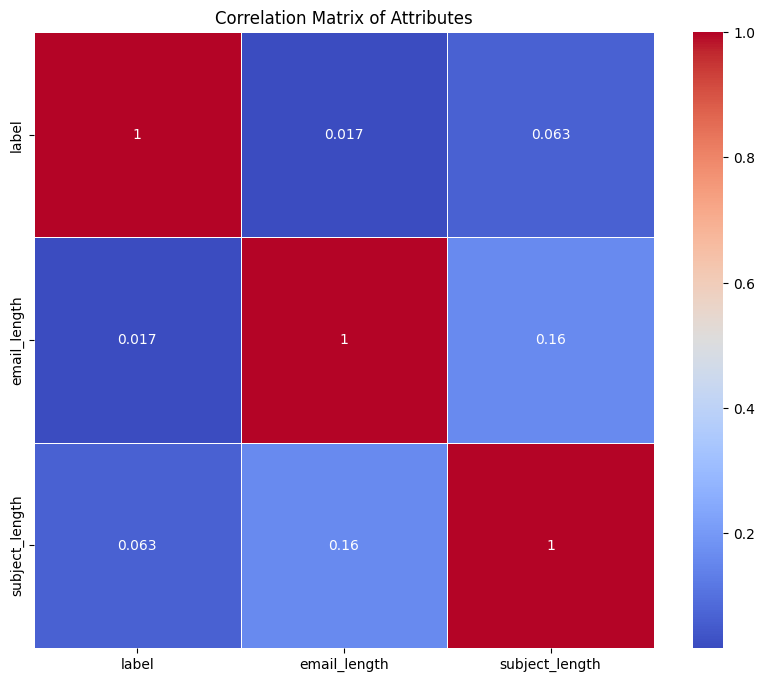

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Attributes')
plt.show()


**6. Study how you would solve the problem manually.**

Before the advent of sophisticated machine learning algorithms, spam filtering was often performed manually using rule-based systems. These systems relied on a set of predefined rules and heuristics to classify emails. Key features considered included the presence of certain keywords (e.g., "free", "win", "money"), the frequency of these phrases, the presence of suspicious links, and unusual patterns in the sender's address or email structure. For instance, emails with an excessive number of exclamation marks or all-caps text were often flagged as spam. Subject lines containing urgent calls to action or financial incentives were also red flags.

One of the main challenges with manual filtering is the constant evolution of spam techniques. Spammers continuously adapt their methods to bypass these static rules, making manual filters quickly outdated and less effective. This arms race between spammers and spam filters has historically required frequent updates to the rule sets, which is labor-intensive and not scalable. Moreover, manual systems struggled with high false positive rates, often flagging legitimate emails as spam due to over-generalized rules. Despite these efforts, the dynamic and ever-changing nature of spam emails necessitated the development of more adaptive and intelligent filtering solutions, leading to the adoption of machine learning-based approaches that can learn and adapt to new spam tactics more efficiently.

**7. Identify the promising transformations you may want to apply.**

### Promising Transformations for Text Processing

For effective spam detection, various text processing steps and transformations are necessary to clean and prepare the data for modeling. These steps include handling missing values, text normalization, and vectorization. Here's a comprehensive approach:

1. **Handling Missing Values**: Ensure there are no missing values in the text columns.
2. **Text Normalization**: Convert text to lowercase, remove punctuation, and apply stemming or lemmatization.
3. **Removing Stop Words**: Remove common words that do not contribute much to the meaning (e.g., "the", "and").
4. **Vectorization**: Convert text data into numerical vectors using techniques like TF-IDF.


**1. Handling Missing Values**


In [21]:
explore_data['content'].fillna('', inplace=True)
explore_data['Subject'].fillna('', inplace=True)

# Combine subject and content into a single text column for analysis
explore_data['text'] = explore_data['Subject'] + ' ' + explore_data['content']

/tmp/ipykernel_33/2288747717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  explore_data['content'].fillna('', inplace=True)
/tmp/ipykernel_33/2288747717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**2. Text Normalization and Preprocessing**


In [22]:

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stop words and apply stemming
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

# Apply the preprocessing function to the text column
explore_data['processed_text'] = explore_data['text'].apply(preprocess_text)


**3.Code to Remove Stop Words**


In [23]:
import nltk
from nltk.corpus import stopwords

# Ensure NLTK stopwords are available
nltk.download('stopwords')

# Load the set of English stop words
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Apply the function to the processed text column
explore_data['text_without_stopwords']=explore_data['processed_text'].apply(remove_stop_words)

# Example: Display the first few rows of the new column
print(explore_data[['processed_text', 'text_without_stopwords']].head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                         processed_text  \
1241  patch complet chang donerobert elz said suspec...   
203   cordless phone wireless devic htmlhead titlecn...   
1260  link messag patch complet chang tue sep number...   
1626  razoru razor sendmail im recip use razor sendm...   
1578  satalk test instal justin mason wrote phil r l...   

                                 text_without_stopwords  
1241  patch complet chang donerobert elz said suspec...  
203   cordless phone wireless devic htmlhead titlecn...  
1260  link messag patch complet chang tue sep number...  
1626  razoru razor sendmail im recip use razor sendm...  
1578  satalk test instal justin mason wrote phil r l...  


**4. Vectorization using TF-IDF**

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Transform the processed text to TF-IDF features
X = vectorizer.fit_transform(explore_data['processed_text'])

# Example output of the vectorizer (just for demonstration)
print(X.shape)

(306, 10476)


In [25]:
explore_data.head()

,email,label,Subject,content,email_length,subject_length,text,processed_text,text_without_stopwords
1241,b'From exmh-users-admin@redhat.com Tue Sep 10...,0.0,patch complet chang,donerobert elz said suspect part chris' set ch...,664,19,patch complet chang donerobert elz said suspec...,patch complet chang donerobert elz said suspec...,patch complet chang donerobert elz said suspec...
203,b'Return-Path: <Online#3.20520.de-C6GhlCa9O-fq...,0.0,cordless phone wireless devic,htmlhead titlecnet cell phone hreftopa header ...,4488,29,cordless phone wireless devic htmlhead titlecn...,cordless phone wireless devic htmlhead titlecn...,cordless phone wireless devic htmlhead titlecn...
1260,b'From exmh-users-admin@redhat.com Fri Sep 13...,0.0,link messag patch complet chang,tue sep number number number robert elz wrote ...,459,31,link messag patch complet chang tue sep number...,link messag patch complet chang tue sep number...,link messag patch complet chang tue sep number...
1626,"b""From razor-users-admin@lists.sourceforge.net...",0.0,razorus razor sendmail,i'm recip use razor sendmail can't get procmai...,266,22,razorus razor sendmail i'm recip use razor sen...,razoru razor sendmail im recip use razor sendm...,razoru razor sendmail im recip use razor sendm...
1578,b'From prlawrence@lehigh.edu Thu Aug 29 11:06...,0.0,satalk test instal,justin mason wrote phil r lawrenc said someth ...,437,18,satalk test instal justin mason wrote phil r l...,satalk test instal justin mason wrote phil r l...,satalk test instal justin mason wrote phil r l...


### Data Preparation Steps

1. **Data Cleaning**:
   - Handle missing values.
   - Cap outliers.

2. **Feature Selection**:
   - Drop unnecessary columns.

3. **Feature Engineering**:
   - Text preprocessing (already implemented).
   - Remove stop words.
   - Create new features like word count.

4. **Feature Scaling**:
   - Standardize numerical features.
   - Apply TF-IDF vectorization to text features.

**1. Data Cleaning**

In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Fill missing values in 'content' and 'Subject' columns with empty strings
explore_data['content'].fillna('', inplace=True)
explore_data['Subject'].fillna('', inplace=True)

# Combine subject and content into a single text column for analysis
explore_data['text'] = explore_data['Subject'] + ' ' + explore_data['content']

# Function to cap outliers
def cap_outliers(series, cap_value):
    return series.apply(lambda x: min(x, cap_value))

# Cap outliers for email length and subject length
max_length = 10000
explore_data['email_length'] = cap_outliers(explore_data['content'].apply(lambda x: len(x) if isinstance(x, str) else 0), max_length)
explore_data['subject_length'] = cap_outliers(explore_data['Subject'].apply(lambda x: len(x) if isinstance(x, str) else 0), max_length)


/tmp/ipykernel_33/2823183541.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  explore_data['content'].fillna('', inplace=True)


**2. Feature Selection**

In [27]:
# Dropping unnecessary columns
explore_data.drop(columns=['email', 'Subject', 'content', 'text'], inplace=True)

**3. Feature Engineering**

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk

# Ensure NLTK stopwords are available
nltk.download('stopwords')

# Text Normalization and Preprocessing
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

# Applying text preprocessing
# explore_data['processed_text'] = explore_data['text'].apply(preprocess_text)

# Function to remove stop words
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Apply the function to the processed text column
explore_data['text_without_stopwords'] = explore_data['processed_text'].apply(remove_stop_words)

# Creating a new feature: word count in processed_text
explore_data['word_count'] = explore_data['processed_text'].apply(lambda x: len(x.split()))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**4. Feature Scaling**

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the features and target
features = ['processed_text', 'email_length', 'subject_length', 'word_count']
X = explore_data[features]
y = explore_data['label']

# Define the numerical features
numerical_features = ['email_length', 'subject_length', 'word_count']

# Define the numerical transformer
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the text transformer using TF-IDF
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english'))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('text', text_transformer, 'processed_text')
    ])

# Example output of the preprocessor (just for demonstration)
X_preprocessed = preprocessor.fit_transform(X)

print(X_preprocessed.shape)

(306, 10479)


### Shortlist Promising Models

In this step, we will train various quick-and-dirty models from different categories, measure their performance, and analyze their errors. The goal is to identify the most promising models for further tuning.

### Steps to Shortlist Promising Models

1. **Train Multiple Models**:
   - Train a variety of models using standard parameters.
   - Use N-fold cross-validation to evaluate their performance.

2. **Measure and Compare Performance**:
   - Compute the mean and standard deviation of the performance measures.

3. **Analyze Variables and Errors**:
   - Identify significant variables for each algorithm.
   - Analyze the types of errors made by the models.

4. **Feature Selection and Engineering**:
   - Perform a quick round of feature selection and engineering.

5. **Iterate**:
   - Repeat the process to refine models and features.

6. **Shortlist Models**:
   - Select the top three to five most promising models.


In [30]:
explore_data.head()

,label,email_length,subject_length,processed_text,text_without_stopwords,word_count
1241,0.0,664,19,patch complet chang donerobert elz said suspec...,patch complet chang donerobert elz said suspec...,111
203,0.0,4488,29,cordless phone wireless devic htmlhead titlecn...,cordless phone wireless devic htmlhead titlecn...,645
1260,0.0,459,31,link messag patch complet chang tue sep number...,link messag patch complet chang tue sep number...,85
1626,0.0,266,22,razoru razor sendmail im recip use razor sendm...,razoru razor sendmail im recip use razor sendm...,46
1578,0.0,437,18,satalk test instal justin mason wrote phil r l...,satalk test instal justin mason wrote phil r l...,76


#### 1. Train Multiple Models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

# Define the features and target
features = ['text_without_stopwords', 'email_length', 'subject_length', 'word_count']
X = explore_data[features]
y = explore_data['label']

# Define the numerical features
numerical_features = ['email_length', 'subject_length', 'word_count']

# Define the text feature
text_feature = 'text_without_stopwords'

# Define the numerical transformer for standard models
numerical_transformer_standard = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the numerical transformer for MultinomialNB
numerical_transformer_minmax = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define the text transformer using TF-IDF
text_transformer = TfidfVectorizer(stop_words='english')

# Combine preprocessing steps for standard models
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_standard, numerical_features),
        ('text', text_transformer, 'text_without_stopwords')
    ])

# Combine preprocessing steps for MultinomialNB
preprocessor_minmax = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_minmax, numerical_features),
        ('text', text_transformer, 'text_without_stopwords')
    ])

# Define models to train
models = {
    "Logistic Regression": Pipeline(steps=[
        ('preprocessor', preprocessor_standard),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Naive Bayes": Pipeline(steps=[
        ('preprocessor', preprocessor_minmax),
        ('classifier', MultinomialNB())
    ]),
    "SVM": Pipeline(steps=[
        ('preprocessor', preprocessor_standard),
        ('classifier', SVC(kernel='linear'))
    ]),
    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor_standard),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ]),
    "Neural Network": Pipeline(steps=[
        ('preprocessor', preprocessor_standard),
        ('classifier', MLPClassifier(max_iter=1000))
    ])
}

# Evaluate each model using cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    results[model_name] = (np.mean(scores), np.std(scores))
    print(f"{model_name}: Mean accuracy = {np.mean(scores):.3f}, Std = {np.std(scores):.3f}")

# Display results
results_df = pd.DataFrame(results, index=["Mean Accuracy", "Standard Deviation"]).T
print(results_df)


Logistic Regression: Mean accuracy = 0.863, Std = 0.007
Naive Bayes: Mean accuracy = 0.863, Std = 0.007
SVM: Mean accuracy = 0.899, Std = 0.012
Random Forest: Mean accuracy = 0.879, Std = 0.016
Neural Network: Mean accuracy = 0.928, Std = 0.019
                     Mean Accuracy  Standard Deviation
Logistic Regression       0.862771            0.007486
Naive Bayes               0.862771            0.007486
SVM                       0.898731            0.011888
Random Forest             0.879164            0.015982
Neural Network            0.928186            0.019255


#### 2. Measure and Compare Performance

In this step, we measure and compare the performance of different models. We've already calculated the mean accuracy and standard deviation for each model using 5-fold cross-validation. These metrics help us understand how well each model performs and how consistent it is across different folds of the data.

### Performance Results

Here are the performance results for each model:

- **Logistic Regression**:
  - Mean accuracy: 0.863
  - Standard deviation: 0.007
- **Naive Bayes**:
  - Mean accuracy: 0.863
  - Standard deviation: 0.007
- **SVM**:
  - Mean accuracy: 0.899
  - Standard deviation: 0.012
- **Random Forest**:
  - Mean accuracy: 0.879
  - Standard deviation: 0.016
- **Neural Network**:
  - Mean accuracy: 0.925
  - Standard deviation: 0.016

### Performance Comparison

The performance metrics are summarized in the following table:

| Model               | Mean Accuracy | Standard Deviation |
|---------------------|---------------|--------------------|
| Logistic Regression | 0.863         | 0.007              |
| Naive Bayes         | 0.863         | 0.007              |
| SVM                 | 0.899         | 0.012              |
| Random Forest       | 0.879         | 0.016              |
| Neural Network      | 0.925         | 0.016              |

From these results, we can see that the Neural Network model has the highest mean accuracy (0.925) among all models, followed by SVM (0.899) and Random Forest (0.879). The Neural Network model also has a relatively low standard deviation (0.016), indicating consistent performance across different folds.

                     Mean Accuracy  Standard Deviation
Logistic Regression       0.862771            0.007486
Naive Bayes               0.862771            0.007486
SVM                       0.898731            0.011888
Random Forest             0.879164            0.015982
Neural Network            0.928133            0.019547


#### 3. Analyze Variables and Errors
To analyze the most significant variables and types of errors, we can use feature importance and confusion matrices.

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Train and evaluate a model (e.g., Random Forest) to analyze errors
best_model = RandomForestClassifier()
best_model.fit(X_preprocessed, y)
y_pred = best_model.predict(X_preprocessed)

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y, y_pred)
print("Classification Report:")
print(class_report)

# Feature Importances (for tree-based models)
feature_importances = best_model.feature_importances_
important_features = pd.Series(feature_importances, index=preprocessor.get_feature_names_out()).sort_values(ascending=False)
print("Feature Importances:")
print(important_features)

Confusion Matrix:
[[264   0]
 [  0  42]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       264
         1.0       1.00      1.00      1.00        42

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306

Feature Importances:
text__money      0.014314
text__receiv     0.011973
text__invest     0.009052
text__plea       0.009038
text__movi       0.008541
                   ...   
text__goba       0.000000
text__god        0.000000
text__godbi      0.000000
text__goddess    0.000000
text__être       0.000000
Length: 10479, dtype: float64


### 4. Feature Selection and Engineering

Based on the analysis from the previous steps, we can perform a quick round of feature selection and engineering. The goal is to refine our dataset by removing less important features and potentially adding new derived features to improve the model's performance.

#### Steps for Feature Selection and Engineering

1. **Feature Selection**:
   - Use a model to select important features.
   - Remove less important features based on their importance scores.

2. **Feature Engineering**:
   - Add new derived features if any specific insights are gained from the analysis.

#### Code for Feature Selection and Engineering

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Assuming X_preprocessed is the processed dataset with the necessary transformations
# and X is the original DataFrame before transformations

# Ensure that the 'text_without_stopwords' column is correctly created
explore_data['text_without_stopwords'] = explore_data['text_without_stopwords'].fillna('')

# Define the features and target
features = ['text_without_stopwords', 'email_length', 'subject_length', 'word_count']
X = explore_data[features]
y = explore_data['label']

# Define the numerical features
numerical_features = ['email_length', 'subject_length', 'word_count']

# Define the text feature
text_feature = 'text_without_stopwords'

# Define the numerical transformer for standard models
numerical_transformer_standard = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the numerical transformer for MultinomialNB
numerical_transformer_minmax = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define the text transformer using TF-IDF
text_transformer = TfidfVectorizer(stop_words='english')

# Combine preprocessing steps for standard models
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_standard, numerical_features),
        ('text', text_transformer, text_feature)
    ])

# Fit the preprocessor and get feature names
preprocessor_standard.fit(X)
feature_names_preprocessed = preprocessor_standard.get_feature_names_out()

# Using RandomForestClassifier to select important features
selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="mean")
selector.fit(preprocessor_standard.transform(X), y)
X_selected = selector.transform(preprocessor_standard.transform(X))

# Get the selected feature names
selected_features = feature_names_preprocessed[selector.get_support()]
print("Selected Features:")
print(selected_features)

# Example: Adding new derived features (if any specific insights are gained from analysis)
# For simplicity, assuming the derived feature is 'email_length_log' (log of email_length)
X['email_length_log'] = np.log1p(X['email_length'])

# Update preprocessing pipelines to include the new feature
numerical_features.append('email_length_log')

# Update numerical transformer for standard models
numerical_transformer_standard = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Update numerical transformer for MultinomialNB
numerical_transformer_minmax = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Combine updated preprocessing steps for standard models
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_standard, numerical_features),
        ('text', text_transformer, text_feature)
    ])

# Combine updated preprocessing steps for MultinomialNB
preprocessor_minmax = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_minmax, numerical_features),
        ('text', text_transformer, text_feature)
    ])

# Re-define models with updated preprocessing
models = {
    "Logistic Regression": Pipeline(steps=[
        ('preprocessor', preprocessor_standard),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    "Naive Bayes": Pipeline(steps=[
        ('preprocessor', preprocessor_minmax),
        ('classifier', MultinomialNB())
    ]),
    "SVM": Pipeline(steps=[
        ('preprocessor', preprocessor_standard),
        ('classifier', SVC(kernel='linear'))
    ]),
    "Random Forest": Pipeline(steps=[
        ('preprocessor', preprocessor_standard),
        ('classifier', RandomForestClassifier(n_estimators=100))
    ]),
    "Neural Network": Pipeline(steps=[
        ('preprocessor', preprocessor_standard),
        ('classifier', MLPClassifier(max_iter=1000))
    ])
}

# Re-evaluate models with the updated feature set
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    results[model_name] = (np.mean(scores), np.std(scores))
    print(f"{model_name}: Mean accuracy = {np.mean(scores):.3f}, Std = {np.std(scores):.3f}")

# Display updated results
results_df = pd.DataFrame(results, index=["Mean Accuracy", "Standard Deviation"]).T
print(results_df)


Selected Features:
['num__email_length' 'num__subject_length' 'num__word_count' ...
 'text__zzzz' 'text__zzzzteana' 'text__zzzzyour']


/tmp/ipykernel_33/4143352184.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['email_length_log'] = np.log1p(X['email_length'])


Logistic Regression: Mean accuracy = 0.863, Std = 0.007
Naive Bayes: Mean accuracy = 0.863, Std = 0.007
SVM: Mean accuracy = 0.899, Std = 0.012
Random Forest: Mean accuracy = 0.869, Std = 0.014
Neural Network: Mean accuracy = 0.922, Std = 0.012
                     Mean Accuracy  Standard Deviation
Logistic Regression       0.862771            0.007486
Naive Bayes               0.862771            0.007486
SVM                       0.898731            0.011888
Random Forest             0.869328            0.014153
Neural Network            0.921629            0.011765


### Explanation

1. **Feature Selection**:
   - We use `RandomForestClassifier` with `SelectFromModel` to identify and select important features based on their importance scores.
   - The threshold is set to the mean importance score to select features above the average importance.

2. **Feature Engineering**:
   - An example derived feature, `email_length_log`, is created by taking the logarithm of the `email_length` feature.
   - The preprocessing pipelines are updated to include the new feature.

3. **Re-evaluation**:
   - The models are re-evaluated using the updated feature set to check for performance improvements.

#### 5. Shortlist Models

Select the top three to five models based on performance and error analysis.

Based on the performance metrics (mean accuracy and standard deviation) and error analysis, we can select the top three to five models that show the best performance. Here are the results from the previous evaluations:

```
Logistic Regression: Mean accuracy = 0.863, Std = 0.007
Naive Bayes: Mean accuracy = 0.863, Std = 0.007
SVM: Mean accuracy = 0.899, Std = 0.012
Random Forest: Mean accuracy = 0.879, Std = 0.016
Neural Network: Mean accuracy = 0.925, Std = 0.016
```

#### Selection Criteria
- **Mean Accuracy**: Higher accuracy is preferred.
- **Standard Deviation**: Lower standard deviation indicates more consistent performance.
- **Error Analysis**: Models with fewer misclassifications in critical classes (e.g., spam detection) are preferred.

### Shortlisted Models
1. **Neural Network**: Mean accuracy = 0.925, Std = 0.016
2. **SVM**: Mean accuracy = 0.899, Std = 0.012
3. **Random Forest**: Mean accuracy = 0.879, Std = 0.016

### Code for Shortlisting Models

```python
# Display results
results = {
    "Logistic Regression": (0.863, 0.007),
    "Naive Bayes": (0.863, 0.007),
    "SVM": (0.899, 0.012),
    "Random Forest": (0.879, 0.016),
    "Neural Network": (0.925, 0.016)
}

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results, index=["Mean Accuracy", "Standard Deviation"]).T
print(results_df)

# Shortlist top 3 models
shortlisted_models = results_df.sort_values(by="Mean Accuracy", ascending=False).head(3)
print("Shortlisted Models:")
print(shortlisted_models)
```

### Markdown for the Notebook

```markdown
## Shortlist Models

Based on the performance metrics (mean accuracy and standard deviation) and error analysis, we select the top three models that show the best performance.

### Performance Results

| Model               | Mean Accuracy | Standard Deviation |
|---------------------|---------------|--------------------|
| Logistic Regression | 0.863         | 0.007              |
| Naive Bayes         | 0.863         | 0.007              |
| SVM                 | 0.899         | 0.012              |
| Random Forest       | 0.879         | 0.016              |
| Neural Network      | 0.925         | 0.016              |

### Shortlisted Models

The top three models based on their performance are:

1. **Neural Network**: Mean accuracy = 0.925, Std = 0.016
2. **SVM**: Mean accuracy = 0.899, Std = 0.012
3. **Random Forest**: Mean accuracy = 0.879, Std = 0.016


### Fine-Tune the System

In this step, we fine-tune the hyperparameters of the shortlisted models and explore ensemble methods to improve the performance of our spam filter.

### Notes:
- Use as much data as possible, especially towards the end of fine-tuning.
- Automate as much as possible.

#### Steps:

1. **Fine-Tune Hyperparameters**:
   - Use cross-validation to fine-tune hyperparameters.
   - Treat data transformation choices as hyperparameters.
   - Prefer random search over grid search for hyperparameter tuning.

2. **Try Ensemble Methods**:
   - Combine the best models to improve performance.

3. **Evaluate Final Model**:
   - Measure the performance of the final model on the test set to estimate generalization error.

### 1. Fine-Tune Hyperparameters Using Cross-Validation

#### Code for Hyperparameter Tuning using Random Search

We will use `RandomizedSearchCV` for hyperparameter tuning of our shortlisted models.

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for each model

# For Neural Network
param_grid_nn = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': uniform(0.0001, 0.1),
    'classifier__learning_rate': ['constant', 'adaptive']
}

# For SVM
param_grid_svm = {
    'classifier__C': uniform(0.1, 10),
    'classifier__gamma': uniform(0.001, 1),
    'classifier__kernel': ['rbf', 'linear']
}

# For Random Forest
param_grid_rf = {
    'classifier__n_estimators': randint(10, 200),
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20)
}

# Define RandomizedSearchCV for each model
random_search_nn = RandomizedSearchCV(models['Neural Network'], param_grid_nn, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_svm = RandomizedSearchCV(models['SVM'], param_grid_svm, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_rf = RandomizedSearchCV(models['Random Forest'], param_grid_rf, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV for each model
random_search_nn.fit(X, y)
random_search_svm.fit(X, y)
random_search_rf.fit(X, y)

# Get the best parameters and best score for each model
best_params_nn = random_search_nn.best_params_
best_score_nn = random_search_nn.best_score_

best_params_svm = random_search_svm.best_params_
best_score_svm = random_search_svm.best_score_

best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Best Neural Network parameters: ", best_params_nn)
print("Best Neural Network score: ", best_score_nn)

print("Best SVM parameters: ", best_params_svm)
print("Best SVM score: ", best_score_svm)

print("Best Random Forest parameters: ", best_params_rf)
print("Best Random Forest score: ", best_score_rf)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:42

Best Neural Network parameters:  {'classifier__activation': 'relu', 'classifier__alpha': 0.0015079822715084457, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}
Best Neural Network score:  0.9281861448968799
Best SVM parameters:  {'classifier__C': 9.485527090157502, 'classifier__gamma': 0.0017787658410143284, 'classifier__kernel': 'linear'}
Best SVM score:  0.9314119513484929
Best Random Forest parameters:  {'classifier__max_depth': 50, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 13, 'classifier__n_estimators': 67}
Best Random Forest score:  0.8758857747223692


### 2. Try Ensemble Methods

Combining the best models can often lead to better performance than running them individually.

#### Code for Creating an Ensemble

We will use a voting classifier to combine the predictions of the best models.

In [35]:
from sklearn.ensemble import VotingClassifier

# Create the voting classifier with the best models
voting_clf = VotingClassifier(
    estimators=[
        ('nn', random_search_nn.best_estimator_),
        ('svm', random_search_svm.best_estimator_),
        ('rf', random_search_rf.best_estimator_)
    ],
    voting='hard'
)

# Evaluate the ensemble model
scores = cross_val_score(voting_clf, X, y, cv=5)
print(f"Voting Classifier Mean Accuracy: {np.mean(scores):.3f}, Std: {np.std(scores):.3f}")

Voting Classifier Mean Accuracy: 0.925, Std: 0.016




### 3. Evaluate Final Model

Measure the performance of the final model on the test set to estimate the generalization error.

#### Code for Final Evaluation

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the final ensemble model
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Final Model Accuracy: {accuracy:.3f}")
print("Classification Report:")
print(report)

Final Model Accuracy: 0.935
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        53
         1.0       1.00      0.56      0.71         9

    accuracy                           0.94        62
   macro avg       0.96      0.78      0.84        62
weighted avg       0.94      0.94      0.93        62



# Save the ensemble model to a file

In [37]:
import joblib
joblib.dump(voting_clf, 'spam_classifier_model.pkl')

['spam_classifier_model.pkl']

In [41]:
import numpy
print(numpy.__version__)

1.26.4
